In [ ]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [6]:
# read the data
train = pd.read_csv('train_LZdllcl.csv')
test  = pd.read_csv('test_2umaH9m.csv')

In [7]:
# total no.of rose and columns
train.shape, test.shape

((54808, 14), (23490, 13))

In [8]:
# get the dataypes
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
# get all details of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
# to see the first few rows
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
# chk missind data
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
train.isna().sum()/train.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [13]:
# percentage of missing data in each column
(train.isna().sum()/train.shape[0]*100).sort_values()

employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
education               4.395344
previous_year_rating    7.524449
dtype: float64

In [14]:
# to check duplicates
train.duplicated().sum()


0

In [16]:
# check target data
train.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [17]:
train.is_promoted.value_counts(normalize=True)*100

is_promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64

<Axes: ylabel='count'>

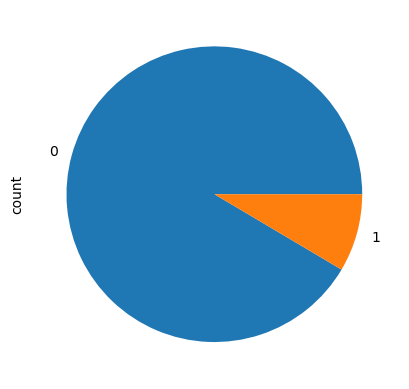

In [21]:
train.is_promoted.value_counts().plot(kind='pie')

In [22]:
tgt_col = ['is_promoted']
ign_cols = ['employee_id']

In [23]:
# statistical info

train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [24]:
train.drop(columns=ign_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [26]:
train.describe(include='object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [28]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [30]:
train.drop(columns=ign_cols).columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [31]:
# check unique values

for col in train.drop(columns=ign_cols).columns:
    print('column name:=>',col,'its respective count',train[col].nunique(),  '=>', train[col].unique())

column name:=> department its respective count 9 => ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
column name:=> region its respective count 34 => ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
column name:=> education its respective count 3 => ["Master's & above" "Bachelor's" nan 'Below Secondary']
column name:=> gender its respective count 2 => ['f' 'm']
column name:=> recruitment_channel its respective count 3 => ['sourcing' 'other' 'referred']
column name:=> no_of_trainings its respective count 10 => [ 1  2  3  4  7  5  6  8 10  9]
column name:=> age its respective count 4

<Axes: xlabel='avg_training_score', ylabel='Density'>

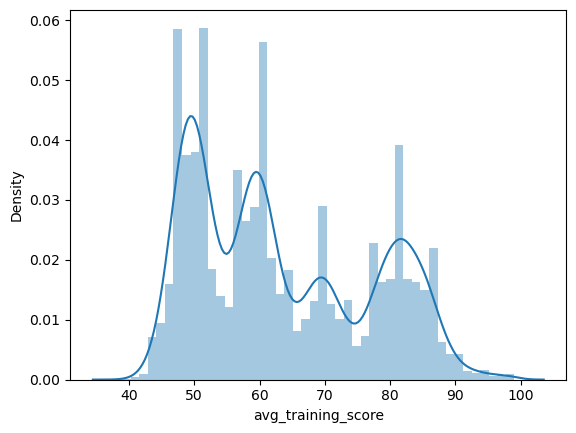

In [32]:
sns.distplot(train.avg_training_score)

In [38]:
exp_tgt = train[['department','is_promoted']].groupby('department').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)

is_promoted,0,1,%
department,,,
Technology,6370,768,10.759316
Procurement,6450,688,9.638554
Analytics,4840,512,9.566517
Operations,10325,1023,9.014804
Finance,2330,206,8.123028
Sales & Marketing,15627,1213,7.203088
R&D,930,69,6.906907
HR,2282,136,5.624483
Legal,986,53,5.101059


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [40]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [69]:
# separate category and numeric features

cat_cols = ['department', 'region', 'education', 'gender','recruitment_channel']
num_cols = ['no_of_trainings','age','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']

In [70]:
print(tgt_col, ign_cols, cat_cols, num_cols, sep='\n')

['is_promoted']
['employee_id']
['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


In [71]:
#### Pipelining
# categorical preperation

cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [72]:
# numerical features preperation

num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])

In [73]:
# map tranformation to features

preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [74]:
# integrate preprocessing and model

model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [75]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [76]:
y = train[tgt_col]
y.head(2)

,is_promoted
0,0
1,0


In [77]:
#train test split 
from sklearn.model_selection import train_test_split, GridSearchCV

In [78]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((49327, 12), (5481, 12), (49327, 1), (5481, 1))

In [79]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [80]:
# fit the model

model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [81]:
# predict target with probability

model_pipeline.predict_proba(val_X)

array([[0.99586993, 0.00413007],
       [0.97826286, 0.02173714],
       [0.9553689 , 0.0446311 ],
       ...,
       [0.95252211, 0.04747789],
       [0.94660061, 0.05339939],
       [0.98181885, 0.01818115]])

In [82]:
model_pipeline.predict_proba(val_X)[:,0]

array([0.99586993, 0.97826286, 0.9553689 , ..., 0.95252211, 0.94660061,
       0.98181885])

In [83]:
model_pipeline.predict_proba(val_X)[:,1]

array([0.00413007, 0.02173714, 0.0446311 , ..., 0.04747789, 0.05339939,
       0.01818115])

In [84]:
# predict target 

model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
# evaluation method

def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()
#model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

Train AUC
0.6266714806821988
Valid AUC
0.6260970342973973
Train cnf_matrix
[[44839   251]
 [ 3140  1097]]
Valid cnf_matrix
[[5023   27]
 [ 320  111]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     45090
           1       0.81      0.26      0.39      4237

    accuracy                           0.93     49327
   macro avg       0.87      0.63      0.68     49327
weighted avg       0.92      0.93      0.91     49327

Valid cls rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5050
           1       0.80      0.26      0.39       431

    accuracy                           0.94      5481
   macro avg       0.87      0.63      0.68      5481
weighted avg       0.93      0.94      0.92      5481



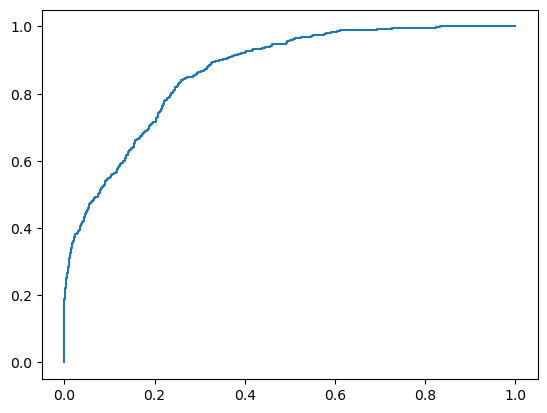

In [86]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [93]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

In [90]:
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],   
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],    
    }

]

In [91]:
grid_3 = GridSearchCV(estimator=model_pipeline, param_grid=params_3, 
                    cv=2, scoring='roc_auc')

In [94]:
over_sampling = RandomOverSampler()

In [95]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [96]:
grid_3.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]},
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier()],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier()],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier()]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]}],
             scoring='roc_auc')

In [97]:
grid_3.best_params_

{'model': LogisticRegression(C=0.5, penalty=None),
 'model__C': 0.5,
 'model__penalty': None}

In [98]:
grid_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression(C=0.5, penalty=None))])

In [99]:
new_model_3 = grid_3.best_estimator_

Train AUC
0.7868921638013147
Valid AUC
0.7996845925891893
Train cnf_matrix
[[34460 10630]
 [  807  3430]]
Valid cnf_matrix
[[3847 1203]
 [  70  361]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     45090
           1       0.24      0.81      0.37      4237

    accuracy                           0.77     49327
   macro avg       0.61      0.79      0.62     49327
weighted avg       0.91      0.77      0.82     49327

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      5050
           1       0.23      0.84      0.36       431

    accuracy                           0.77      5481
   macro avg       0.61      0.80      0.61      5481
weighted avg       0.92      0.77      0.82      5481



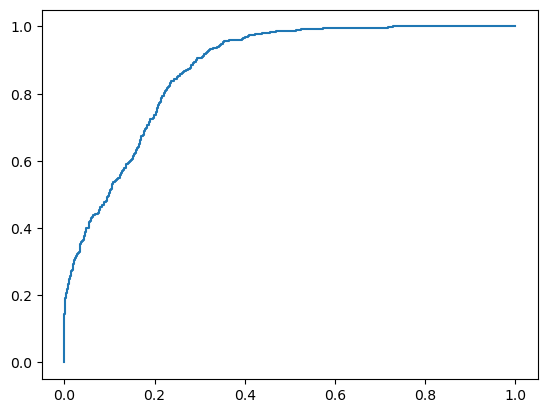

In [100]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_3)

In [111]:
res_df_3 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 0.5, 'model__penalty': 'l2'}",0.875288,4
1,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 0.5, 'model__penalty': None}",0.875602,1
2,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 3, 'model__penalty': 'l2'}",0.875559,3
3,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 3, 'model__penalty': None}",0.875602,1
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.782569,14
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.833131,12
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 5}",0.830216,13
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 35}",0.840320,11
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 5}",0.856448,10
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 35}",0.857398,9


In [112]:
sub = pd.read_csv('sample_submission_M0L0uXE.csv')
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [113]:
# updating the existing target values with predicted values
sub['target'] = new_model_3.predict(test)
sub.to_csv('sub_3.csv',index=False)

In [109]:
sub

,employee_id,is_promoted,target
0,8724,0,1
1,74430,0,0
2,72255,0,0
3,38562,0,0
4,64486,0,0
...,...,...,...
23485,53478,0,0
23486,25600,0,0
23487,45409,0,0
23488,1186,0,0


In [101]:
import joblib

In [108]:
joblib.dump(new_model_3,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [114]:
train.iloc[0]

employee_id                         65438
department              Sales & Marketing
region                           region_7
education                Master's & above
gender                                  f
recruitment_channel              sourcing
no_of_trainings                         1
age                                    35
previous_year_rating                  5.0
length_of_service                       8
KPIs_met >80%                           1
awards_won?                             0
avg_training_score                     49
is_promoted                             0
Name: 0, dtype: object